In [1]:
#%%
import os
import FinanceDataReader as fdr
from bt.algos import RunDaily
from pypfopt.expected_returns import prices_from_returns
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quantstats as qs
import seaborn as sns
import sys

pd.options.display.float_format = '{:.4f}'.format
plt.style.use('default') #ggplot
plt.rcParams['font.family'] = 'nanummyeongjo'
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.grid'] = True

plt.rcParams['axes.formatter.useoffset'] = False
# plt.rcParmas['axes.formatter.limits'] = -1000, 1000

plt.rcParams['axes.unicode_minus'] = False

from IPython.display import display, HTML

# sys.path.insert(0, "/Users/hosung/workspace/git/bt/")
# for p in sys.path:
#     print(p)
%matplotlib inline

import bt
bt.__version__

(0, 2, 9)

In [2]:
def long_only_ew(data, tickers, start_date, name='long_only_ew', initial_capital=1000000.0):
    s = bt.Strategy(name,
    [
        bt.algos.RunAfterDate(start_date),
        bt.algos.RunOnce(),
        bt.algos.SelectThese(tickers),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ])
    return bt.Backtest(s, data, initial_capital=initial_capital)

In [3]:
df = pd.read_csv('/Users/hosung/workspace/git/docu/data/asset_db.csv', index_col=0, parse_dates=True)

In [4]:
cols = ['nasdaq100_UH', 'kbond20y', 'kodex200x2', 'usdkrwx2']
price_df = df[cols].copy()
#nasdaq100_UH 1985-10-02 00:00:00
#kbond20y 1981-05-01 00:00:00
#kodex200x2 1981-05-01 00:00:00
#usdkrwx2 1981-05-01 00:00:00


In [5]:
price_df = price_df.dropna()['2002-12-29':'2020-6']
start_date = '2003-6-27'

In [13]:
def strategy_aibeta(price_df, lookback=3, max=0.5):
    st = bt.Strategy(f"AIBeta_{lookback}_{max:.2f}",
                    [
                        bt.algos.RunAfterDate(start_date),
                        bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=True),
                        # bt.algos.PrintDate(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighMeanVar(lookback=pd.DateOffset(months=lookback), lag = pd.DateOffset(days=1),
                                            bounds=(0.0, max), covar_method='standard'),
                        bt.algos.Rebalance()
                    ])
    bt_ai_beta = bt.Backtest(st, price_df)
    return bt_ai_beta

In [16]:
test_aibeta = {}
for lookback in range(3, 13):
    # print(f"lookback : {lookback}")
    for bound in np.arange(0.35, 0.5, 0.05):
        test_aibeta[f'AIBeta_{lookback}_{bound:.2f}'] = strategy_aibeta(price_df, lookback, bound)
# %%
rm = bt.run(*test_aibeta.values())

lookback : 3
lookback : 4
lookback : 5
lookback : 6
lookback : 7
lookback : 8
lookback : 9
lookback : 10
lookback : 11
lookback : 12


/Users/hosung/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/Users/hosung/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [17]:
rm.stats

,AIBeta_3_0.35,AIBeta_3_0.40,AIBeta_3_0.45,AIBeta_3_0.50,AIBeta_4_0.35,AIBeta_4_0.40,AIBeta_4_0.45,AIBeta_4_0.50,AIBeta_5_0.35,AIBeta_5_0.40,...,AIBeta_10_0.45,AIBeta_10_0.50,AIBeta_11_0.35,AIBeta_11_0.40,AIBeta_11_0.45,AIBeta_11_0.50,AIBeta_12_0.35,AIBeta_12_0.40,AIBeta_12_0.45,AIBeta_12_0.50
start,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,...,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00,2002-12-29 00:00:00
end,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,...,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00,2020-06-30 00:00:00
rf,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
total_return,7.2956,6.3761,6.1134,6.0794,5.3421,4.8639,5.1155,5.3684,4.5726,4.4027,...,5.5487,5.7967,5.1304,5.1732,5.3730,5.5452,4.6105,4.8068,5.0750,5.2108
cagr,0.1285,0.1209,0.1186,0.1183,0.1113,0.1063,0.1090,0.1116,0.1031,0.1012,...,0.1133,0.1157,0.1092,0.1096,0.1116,0.1133,0.1036,0.1057,0.1086,0.1100
max_drawdown,-0.1598,-0.1578,-0.1713,-0.1840,-0.1807,-0.1948,-0.2159,-0.2180,-0.1705,-0.1833,...,-0.2128,-0.2355,-0.1666,-0.1885,-0.2043,-0.2189,-0.1658,-0.1771,-0.1927,-0.2151
calmar,0.8039,0.7666,0.6926,0.6429,0.6159,0.5460,0.5049,0.5118,0.6047,0.5521,...,0.5325,0.4913,0.6551,0.5814,0.5464,0.5177,0.6244,0.5968,0.5635,0.5113
mtd,-0.0085,-0.0099,-0.0109,-0.0105,-0.0101,-0.0130,-0.0130,-0.0131,-0.0100,-0.0129,...,-0.0103,-0.0116,-0.0076,-0.0100,-0.0096,-0.0097,-0.0051,-0.0039,-0.0038,-0.0039
three_month,0.0842,0.0669,0.0538,0.0434,0.0847,0.0673,0.0563,0.0451,0.0869,0.0723,...,0.0995,0.1003,0.0889,0.0793,0.0822,0.0824,0.0920,0.0949,0.0948,0.0950
six_month,0.0212,0.0075,-0.0043,-0.0150,0.0109,-0.0105,-0.0244,-0.0341,-0.0022,-0.0202,...,0.0676,0.0684,0.0556,0.0453,0.0483,0.0492,0.0645,0.0670,0.0641,0.0629


In [18]:
rm.stats.to_csv('AIBeta_results.csv')

In [29]:
stats = rm.stats.loc[['total_return', 'cagr', 'max_drawdown', 'daily_sharpe'],:].T
stats.columns = ['return', 'cagr', 'mdd', 'sharpe']
stats['mdd'] = stats['mdd']*-1
stats.sort_values(by='return', ascending=False)

,return,cagr,mdd,sharpe
AIBeta_3_0.35,7.2956,0.1285,0.1598,1.0214
AIBeta_6_0.50,6.4062,0.1212,0.2022,0.8895
AIBeta_3_0.40,6.3761,0.1209,0.1578,0.9638
AIBeta_3_0.45,6.1134,0.1186,0.1713,0.9236
AIBeta_3_0.50,6.0794,0.1183,0.1840,0.8796
AIBeta_6_0.45,6.0487,0.1180,0.2053,0.8908
AIBeta_8_0.50,5.8825,0.1165,0.1958,0.8745
AIBeta_10_0.50,5.7967,0.1157,0.2355,0.8604
AIBeta_6_0.40,5.7924,0.1157,0.1913,0.8994
AIBeta_7_0.50,5.5739,0.1136,0.2281,0.8402


<AxesSubplot:>

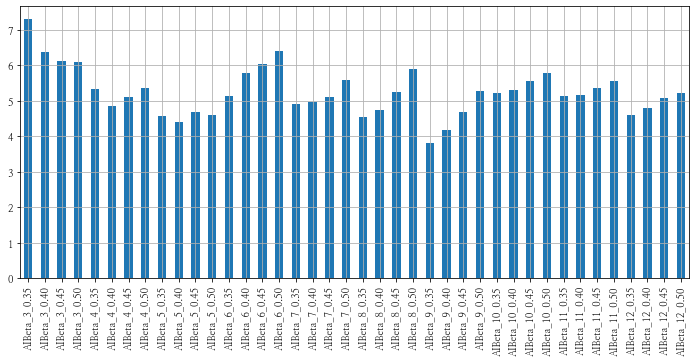

In [32]:
stats['return'].plot.bar(figsize=(12, 5))#, secondary_y=['mdd'])

<AxesSubplot:>

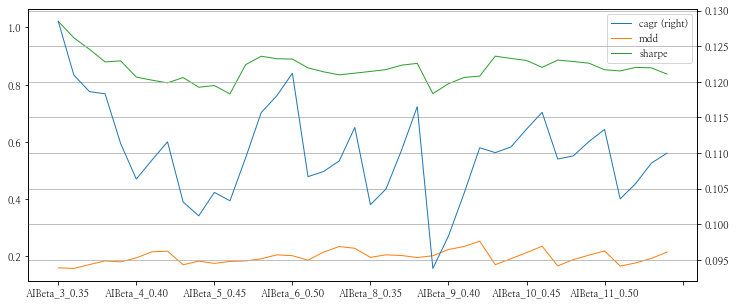

In [35]:
stats[['cagr', 'mdd', 'sharpe']].plot(figsize=(12,5), secondary_y=['cagr'])

In [37]:
bt_ew = long_only_ew(price_df, cols, start_date, "ew")

bt_kodex200x2 = long_only_ew(price_df, ["kodex200x2"], start_date, "kodex200x2")
bt_kbond20y = long_only_ew(price_df, ["kbond20y"], start_date, "kbond20y")
bt_nasdaq100_UH = long_only_ew(price_df, ["nasdaq100_UH"], start_date, "nasdaq100_UH")
bt_usdkrwx2 = long_only_ew(price_df, ["usdkrwx2"], start_date, "usdkrwx2")

bt_ai_beta = strategy_aibeta(price_df, 3, 0.35)

In [38]:
r = bt.run(bt_ai_beta, bt_kodex200x2, bt_kbond20y, bt_nasdaq100_UH, bt_usdkrwx2)

In [39]:
r.set_date_range(start=start_date)
r.display()

Stat                 AIBeta_3_0.35    kodex200x2    kbond20y    nasdaq100_UH    usdkrwx2
-------------------  ---------------  ------------  ----------  --------------  ----------
Start                2003-06-27       2003-06-27    2003-06-27  2003-06-27      2003-06-27
End                  2020-06-30       2020-06-30    2020-06-30  2020-06-30      2020-06-30
Risk-free rate       0.00%            0.00%         0.00%       0.00%           0.00%

Total Return         729.56%          386.03%       237.94%     769.84%         12.83%
Daily Sharpe         1.04             0.44          0.66        0.71            0.14
Daily Sortino        1.71             0.69          1.06        1.17            0.23
CAGR                 13.24%           9.74%         7.42%       13.56%          0.71%
Max Drawdown         -15.98%          -81.02%       -24.43%     -29.89%         -56.80%
Calmar Ratio         0.83             0.12          0.30        0.45            0.01

MTD                  -0.85%       

/Users/hosung/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1389: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


<AxesSubplot:>

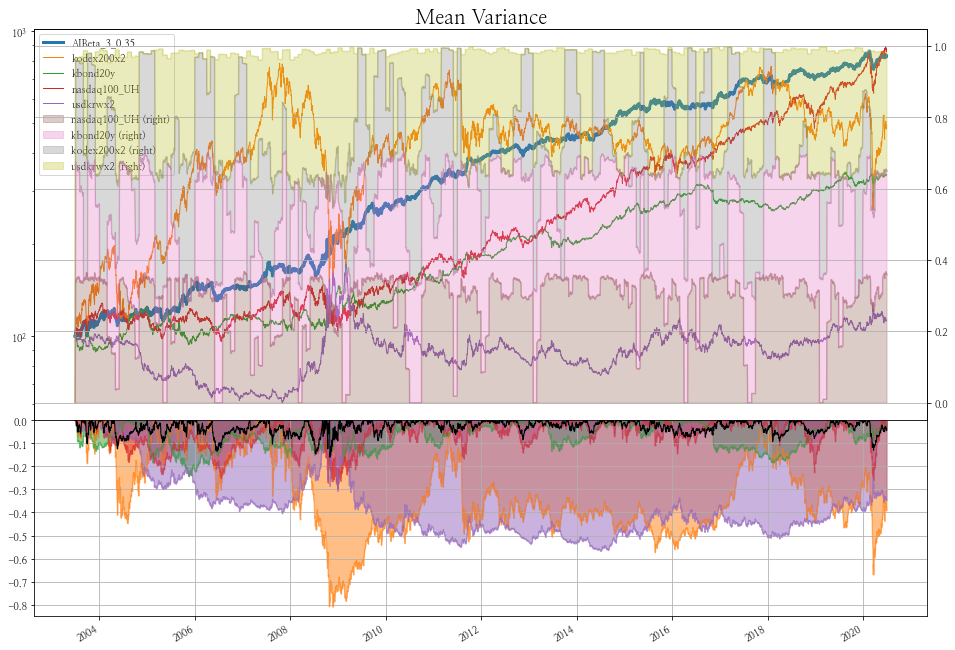

In [41]:
res1 = r
start = start_date
end = '2020-06-30'
plt.rcParams["figure.figsize"] = [16, 12]
plt.subplots_adjust(hspace=0)

# 첫번째 칸에 그림을 그린다.
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=2)
# 두개를 한 칸에 그리기 위해 ax=ax1으로 axis공유
ax2 = res1.prices[start:end].plot(ax=ax1, style=['-', '-', '-', '-', '-', '-', '-'], lw=1, logy=True) # 모든 데이터 r_all
for line in ax2.get_lines():
    if line.get_label() == 'AIBeta_3_0.35' or line.get_label() == 'AIBet_ERC' or line.get_label() == 'AIBet_InvVol':
        line.set_linewidth(3)
plt.legend(loc="upper left");
plt.title('Mean Variance', fontsize=20)
res1.get_security_weights('AIBeta_3_0.35')[start:end].plot.area(alpha=0.3, ax=ax1, secondary_y=True)


# 두번째 칸에 그림을 그린다.
# drawdown을 그림다. 두개를 하나에 그리기 위해 ax=ax2로 axis를 공유
ax2 = plt.subplot2grid((3,1), (2,0))
res1.prices[start:end].to_drawdown_series().plot.area(stacked=False,legend=False, ax=ax2)
res1.prices.loc[start:end,'AIBeta_3_0.35'].to_drawdown_series().plot(legend=False, color='black', alpha=1, lw=1, ls='-', ax=ax2)


In [42]:
r.display_monthly_returns('AIBeta_3_0.35')

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2003   0      0      0      0      0      0      2.61   6.99  -8.69  10.71   0.83   1.4   13.46
  2004   1.73   2.97  -0.79  -1.3   -1.75   0.73   0.04   1.65   1.89  -1.55   2.29   3.67   9.82
  2005  -5.26   4.55  -1.51  -7.33   6.92  -0.2    2.92  -0.46   9.77  -4.36   9.69   3.52  17.78
  2006   1.22  -0.45  -0.73   0.68  -6.22  -1.85   2.05   2.73   1.2   -0.75   1.95  -0.38  -0.87
  2007  -2.01   2.49   1.18   0.35   5.13   1.36   6.95  -0.09  -0.33   1.91  -4.12   1.95  15.27
  2008  -0.85  -1.88   3.36   5.57   0.81  -5.48  -4.17   8.62   6.14   1.53   9.89  -3.47  20.37
  2009   8.02   0.34   0.53   4.59   0.1    1.28   9.6    3.22   0.26  -5.02   1.46   7.3   35.49
  2010  -4.02   2.32   2.61   1.59  -1.24   2.29   0.87   2.43   3.81   0.18   3.16   5.14  20.53
  2011  -0.16  -2.66

                           Strategy
-------------------------  ----------
Start Period               2003-06-30
End Period                 2020-06-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          729.56%
CAGR﹪                     13.24%

Sharpe                     1.04
Smart Sharpe               1.02
Sortino                    1.53
Smart Sortino              1.51
Sortino/√2                 1.08
Smart Sortino/√2           1.07
Omega                      1.22

Max Drawdown               -15.98%
Longest DD Days            483
Volatility (ann.)          13.05%
Calmar                     0.83
Skew                       0.25
Kurtosis                   22.91

Expected Daily %           0.05%
Expected Monthly %         1.04%
Expected Yearly %          12.47%
Kelly Criterion            9.77%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.3%
Expected Shortfall (cVaR)  -1.3%

Gain/Pain Ratio            0.22
Gain/Pain (1M)             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-10-29,2008-10-30,2009-01-15,78,-15.9828,-15.1367
2,2008-05-16,2008-07-15,2008-09-03,110,-14.5314,-14.4287
3,2006-01-17,2006-06-20,2007-02-22,401,-13.4173,-13.0112
4,2020-02-21,2020-03-23,2020-06-30,130,-12.9439,-11.7534
5,2008-10-09,2008-10-14,2008-10-23,14,-12.3461,-12.0394


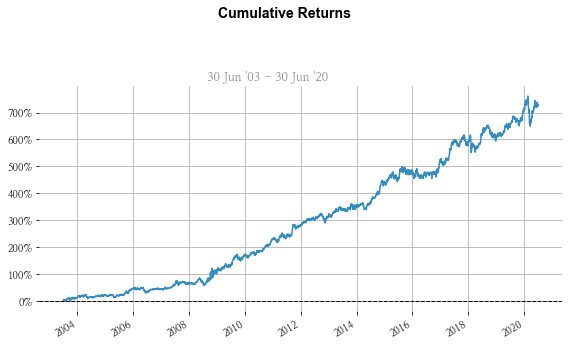

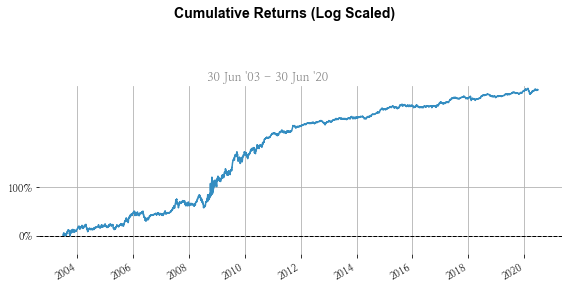

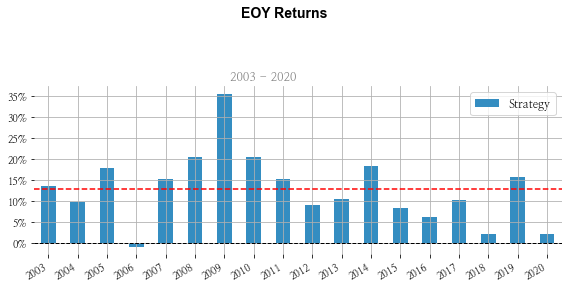

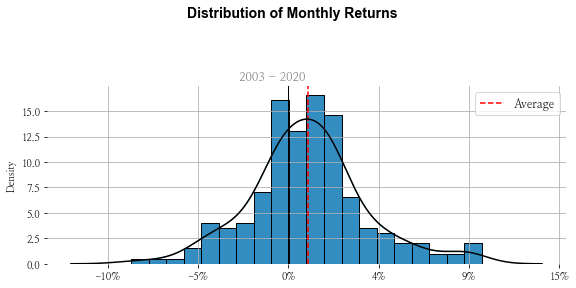

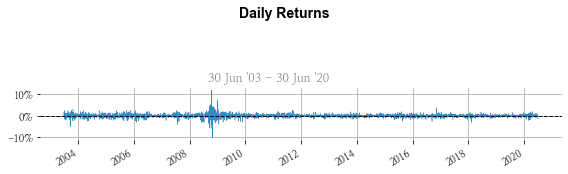

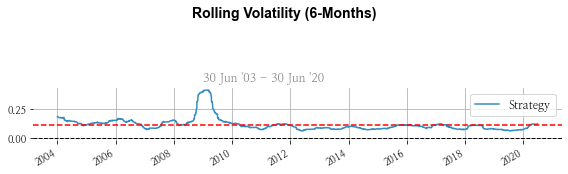

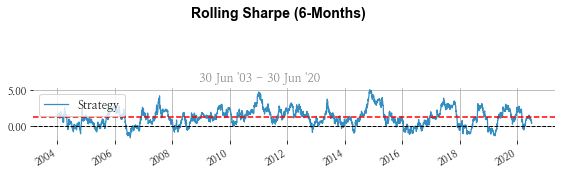

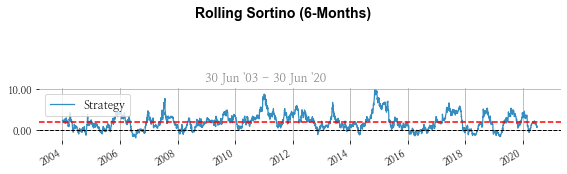

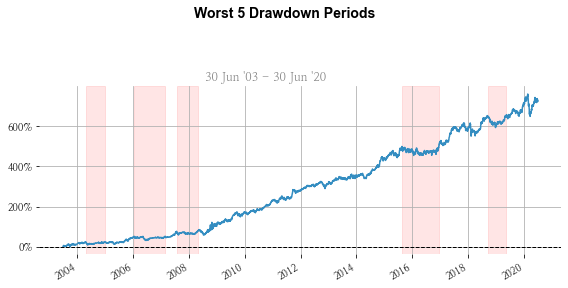

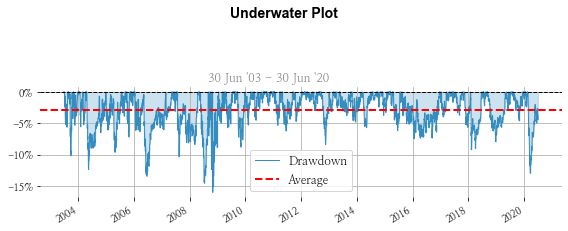

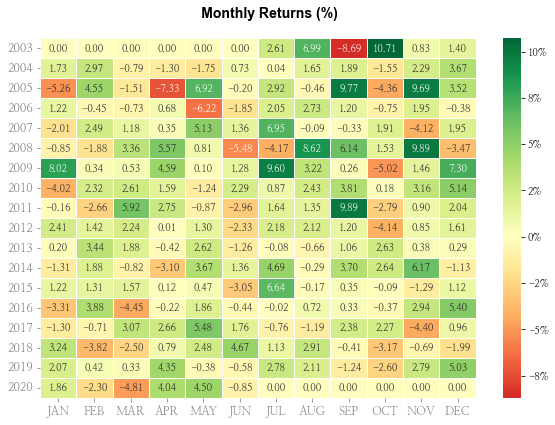

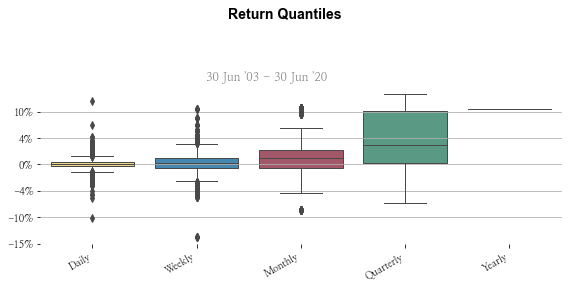

In [43]:
qs.reports.full(r.prices['AIBeta_3_0.35'].to_returns().dropna())